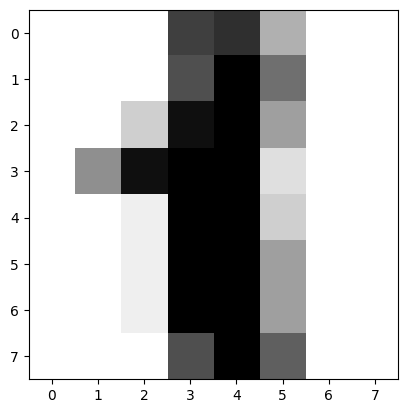

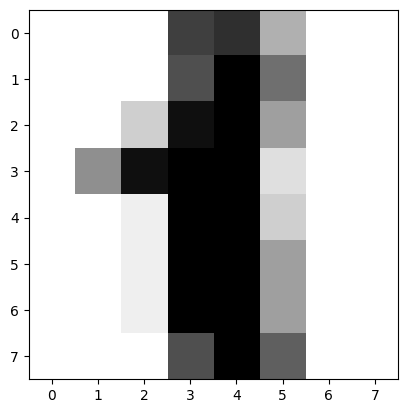

17/17 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9741
Test accuracy:  0.9740740656852722


In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

data = datasets.load_digits()

X_data = data.images
y_data = data.target


# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
# one-hot encoding of y_data
y_data = to_categorical(y_data)

# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

model = Sequential()

# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
# activation layer before pooling
model.add(Activation('relu'))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.legend(['training', 'validation'], loc = 'upper left')
#plt.show()

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

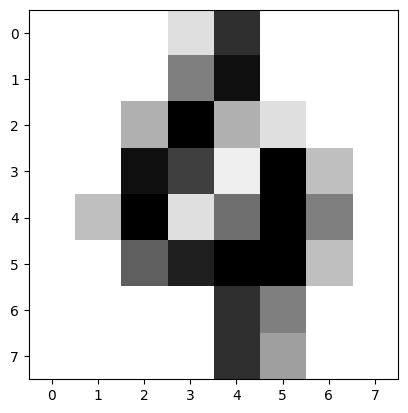

4


In [13]:
plt.imshow(data.images[100], cmap=plt.cm.gray_r)
plt.show()
print(data.target[100])